Implement Random Forest
<br>
Implement Ensemble learning for any 3 classifiers

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier

In [9]:
# Load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Simple data preparation
# Prepare features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data prepared successfully!")

Training set: (614, 8)
Test set: (154, 8)
Data prepared successfully!


In [11]:
# 1. Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)


# 2. AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)
ada_pred = ada_classifier.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)


# 3. Voting Classifier (combining Random Forest and AdaBoost)
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('ada', AdaBoostClassifier(random_state=42))
    ],
    voting='hard'
)

voting_classifier.fit(X_train, y_train)
voting_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)

### Basic Working of Each Classifier

**RandomForestClassifier**  
Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) of the individual trees. Each tree is trained on a random subset of the data and features, which helps reduce overfitting and improves generalization.

**AdaBoostClassifier**  
AdaBoost (Adaptive Boosting) combines multiple weak learners (typically shallow decision trees) in sequence. Each subsequent model focuses more on the samples that previous models misclassified by adjusting their weights. The final prediction is a weighted vote of all models, making AdaBoost effective at improving accuracy.

**VotingClassifier**  
Voting Classifier is an ensemble method that combines predictions from multiple different classifiers (e.g., Random Forest, AdaBoost). It aggregates their predictions using majority voting (for classification) or averaging (for regression). This approach leverages the strengths of each base model to produce more robust and stable predictions.

In [12]:
# Performance Comparison
print("\nPERFORMANCE COMPARISON")

# Calculate detailed metrics for all models
models_data = []

# Random Forest metrics
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

models_data.append({
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
})

# AdaBoost metrics
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)

models_data.append({
    'Model': 'AdaBoost',
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1
})

# Voting Classifier metrics
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)

models_data.append({
    'Model': 'Voting Classifier',
    'Accuracy': voting_accuracy,
    'Precision': voting_precision,
    'Recall': voting_recall,
    'F1-Score': voting_f1
})

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_data)

print("\nPerformance Metrics:")
print(comparison_df.round(4).to_string(index=False))


PERFORMANCE COMPARISON

Performance Metrics:
            Model  Accuracy  Precision  Recall  F1-Score
    Random Forest    0.7208     0.6071  0.6182    0.6126
         AdaBoost    0.7792     0.6780  0.7273    0.7018
Voting Classifier    0.7532     0.6735  0.6000    0.6346


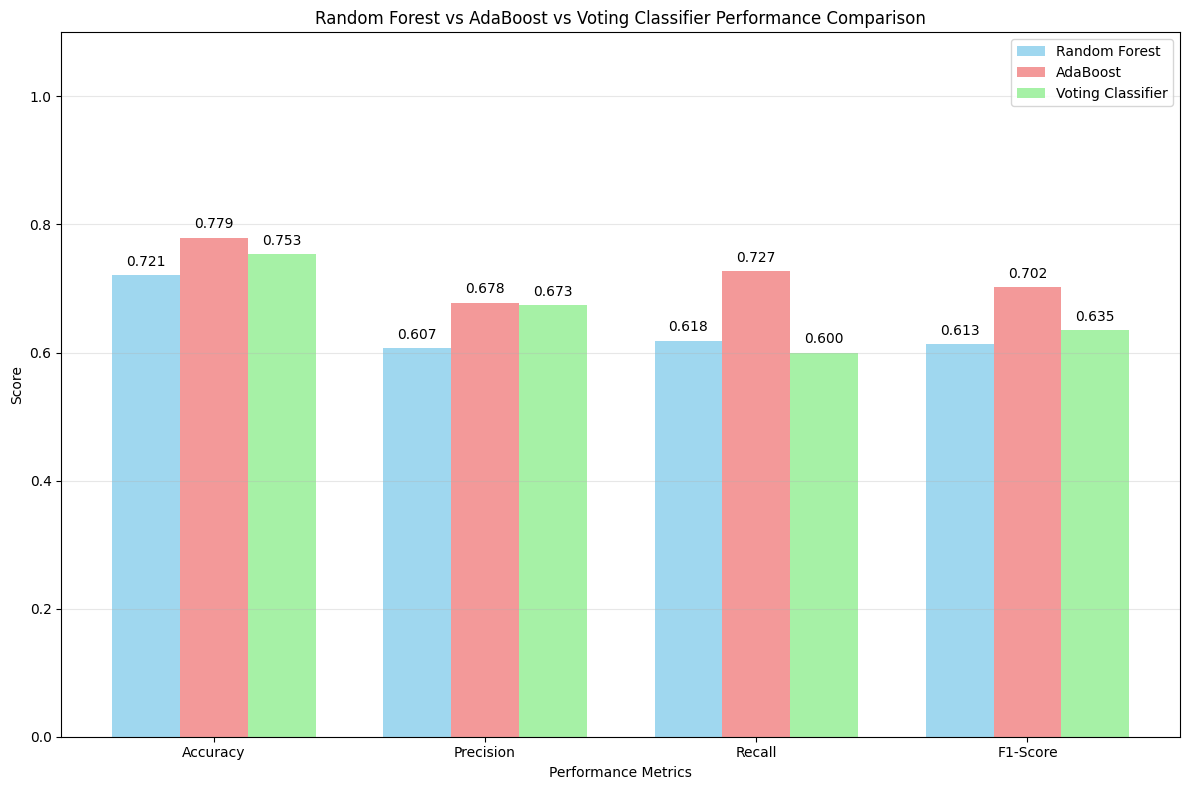

In [13]:
# Performance Visualization
plt.figure(figsize=(12, 8))

# Prepare data for visualization
models = comparison_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create grouped bar chart
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models):
    values = [comparison_df.iloc[i][metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model, color=colors[i], alpha=0.8)
    
    # Add value labels on bars
    for j, v in enumerate(values):
        plt.text(x[j] + i*width, v + 0.01, f'{v:.3f}', 
                ha='center', va='bottom', fontsize=10)

plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Random Forest vs AdaBoost vs Voting Classifier Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Inference

After evaluating the performance of Random Forest, AdaBoost, and Voting Classifier on the diabetes dataset, we observe the following:

- **Random Forest** achieved an accuracy of approximately 0.72. It provides a good balance between precision and recall, making it a reliable choice for this classification task. Its ensemble nature helps reduce overfitting and improves generalization.

- **AdaBoost** outperformed the other models with an accuracy of about 0.78. It also achieved the highest recall and F1-score among the three classifiers, indicating its effectiveness in correctly identifying positive cases. AdaBoost’s boosting approach helps focus on difficult samples, leading to improved performance.

- **Voting Classifier** combines the predictions of Random Forest and AdaBoost. It achieved an accuracy of around 0.75, which is higher than Random Forest but slightly lower than AdaBoost. The Voting Classifier leverages the strengths of both base models, resulting in stable and robust predictions.